In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Basic DNN Example

Using our housing example, let's estimate a DNN and compare it to the results of the Random Forest.

This example borrows heavily from:

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/regression.ipynb#scrollTo=F0qutYAKwoda

In [5]:
df = pd.read_csv("C:/Users/jhtchns2/Downloads/houseprices/Cleaned train.csv")

df

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Saleprice
0,1,18.144573,13.833054,7,3.991517,2003,2003,19.433175,144.117862,0.000000,...,0,0,1,0,0,0,0,1,0,208501.0
1,2,20.673625,14.117918,6,6.000033,1976,1976,54.598150,181.719186,0.000000,...,0,0,1,0,0,0,0,1,0,181501.0
2,3,18.668047,14.476512,7,3.991517,2001,2002,17.768840,110.441033,0.000000,...,0,0,1,0,0,0,0,1,0,223501.0
3,4,17.249651,14.106196,7,3.991517,1915,1970,54.598150,61.795315,0.000000,...,0,0,1,1,0,0,0,0,0,140001.0
4,5,21.314283,15.022008,8,3.991517,2000,2000,25.404164,136.624601,0.000000,...,0,0,1,0,0,0,0,1,0,250001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,17.611139,13.688829,6,3.991517,1999,2000,54.598150,665.141633,0.000000,...,0,0,1,0,0,0,0,1,0,175001.0
1454,1455,21.472480,14.838658,6,4.679501,1978,1988,15.342608,156.123103,8.046409,...,0,0,1,0,0,0,0,1,0,210001.0
1455,1456,18.320139,13.983828,7,6.637669,1941,2006,54.598150,73.494065,0.000000,...,0,0,1,0,0,0,0,1,0,266501.0
1456,1457,18.668047,14.145129,5,4.679501,1950,1996,54.598150,21.007316,13.087759,...,0,0,1,0,0,0,0,1,0,142126.0


Let's use the same number of features:

In [6]:
features = ['LotArea', 'OverallQual', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
               'Fireplaces', 'GarageArea', 'Total_Home_Quality', 'TotalSF',
               'YrBltAndRemod', 'Total_Bathrooms', 'GarageCars_log_sq',
               'Neighborhood_NoRidge', 'ExterQual_Ex', 'ExterQual_TA', 'BsmtQual_Ex',
               'BsmtExposure_Gd', 'KitchenQual_Ex']

In [7]:
X = df[features]

y = df[['Saleprice']]

In the Tensorflow package, we can add a preprocessing step into the network itself:

In [10]:
normalizer = preprocessing.Normalization()

normalizer.adapt(X.values)

In the given code, they made a nice function that will build a two hidden layer, 64 neuron network given a normalization object.

In [11]:
def build_and_compile_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) # Notice this one only has one neuron, so it is the output layer.
              ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [12]:
model = build_and_compile_model(normalizer)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 18)                37        
_________________________________________________________________
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,478
Trainable params: 5,441
Non-trainable params: 37
_________________________________________________________________


There are 5k parameters to train!

In [40]:
runs = model.fit(X,y,validation_split=0.2,
                    verbose=0, epochs=1000)

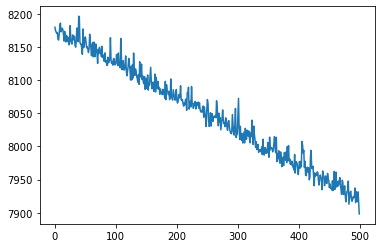

In [26]:
plt.plot(runs.history['loss'])

In [27]:
df['y_hat'] = model.predict(X)

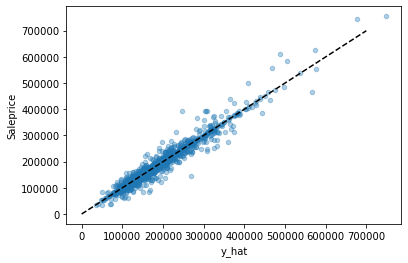

In [28]:
df[['Saleprice','y_hat']].plot(kind='scatter',y="Saleprice",x='y_hat',alpha=.35)
plt.plot(np.linspace(0,700000,10),np.linspace(0,700000,10),color="black",ls="--")

Now let's look at the RMSE:

In [29]:
((df['Saleprice']-df['y_hat'])**2).mean()**.5

18189.67031298166

So actually not as good as our Random Forest. Possibly this is because DNN is actually less helpful on smaller datasets.

We could likely get higher efficiency from trying to choose different neuron and hidden layer sizes.

In [33]:
test = pd.read_csv("C:/Users/jhtchns2/Downloads/houseprices/Cleaned test.csv")
X_test = test[features].values
test['dnn_pred'] = model.predict(X_test)

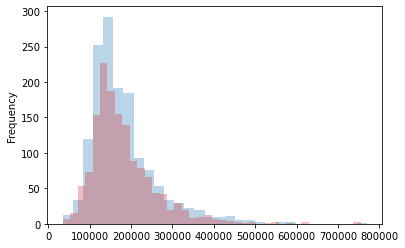

In [35]:
test.dnn_pred.plot(kind="hist",bins=30,alpha=.3)
df['Saleprice'].plot(kind="hist",bins=40,color='C3',alpha=.3)

Let's compare directly to Random Forest

In [36]:
test['rf_pred'] = pd.read_csv('rf_prices.csv')['sale_price_pred']

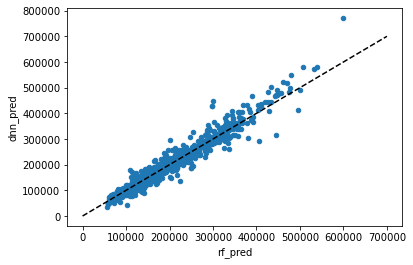

In [39]:
test[['rf_pred','dnn_pred']].plot(kind='scatter',x='rf_pred',y='dnn_pred')
plt.plot(np.linspace(0,700000,10),np.linspace(0,700000,10),color="black",ls="--")